# Investigating gun data in the U.S.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<ul>
<li><a href='#wrangling_gd'>Data Cleaning (gun_data.xlsx)</a></li>
<li><a href='#wrangling_cd'>Data Cleaning (U.S. Census Data.csv)</a></li>
</ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<ul>
<li><a href='q1'>Q1: Does the number of veterans per state affect the number of gun purchases?</a></li>
<li><a href='q2'>Q2: Does the number of foreign born persons per state affect the number of gun purchases?</a></li>
<li><a href='q3'>Q3: What is the overall trend of gun purchases?</a></li></ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The following analysis is based on data from the FBI's National Instant Criminal Background Check System which can be found on [GitHub](https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md). The data set consists of two files:
- **gun_data.xlsx**: containing the actual gun data per state per month
- **U.S. Census Data.csv**: containing some variables on state level which can be used to investigate if certain aspects have an effect on the number of guns per state

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [38]:
# Create a dataframe based on the gun_data.xlsx
df_gd = pd.read_excel('gun_data.xlsx')

# Create a dataframe based on the raw census data
df_c_raw = pd.read_csv('U.S. Census Data.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties of the file: gun_data.xlsx

Getting a general overview over the data:

In [39]:
df_gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

**Observation:**
- The column 'month' has an incorrect datatype (_object_ instead of _datetime64[ns]_)

### General Properties of the file: U.S. Census Data.csv

Getting a general overview over the data:

In [40]:
df_c_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

**Observations:**
- The column 'Fact Note' can be dropped.
- The last 20 rows of the file contain explanations and can be dropped.
- The columns and rows are switched (rows contain variables and the columns contain the states).

<a id='wrangling_gd'></a>
### Data Cleaning (gun_data.xlsx)

In [41]:
# change dtype of the column 'month'
df_gd['month'] = df_gd['month'].astype('datetime64[ns]')

<a id='wrangling_cd'></a>
### Data Cleaning (U.S. Census Data.csv)

In [42]:
# create dataframe and skip last 20 lines
df_c_raw = pd.read_csv('U.S. Census Data.csv', skipfooter=20, header=0, engine='python')

In [43]:
# drop 'Fact Note' column
df_c_raw = df_c_raw.drop('Fact Note', axis=1)

In [44]:
# setting the index to use "Fact" as keys
df_c_raw.set_index('Fact', inplace=True)

In [45]:
# transpose the dataframe for easier handling
df_c_raw = df_c_raw.transpose()

In [46]:
# get info about the new dataframe
df_c_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 65 columns):
Population estimates, July 1, 2016,  (V2016)                                              50 non-null object
Population estimates base, April 1, 2010,  (V2016)                                        50 non-null object
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     50 non-null object
Population, Census, April 1, 2010                                                         50 non-null object
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    50 non-null object
Persons under 5 years, percent, April 1, 2010                                             50 non-null object
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   50 non-null object
Persons under 18 years, percent, April 1, 2010                                            50 non-null object
Persons 65 years an

**I choose to investigate the variables 'Veterans, 2011-2015' and 'Foreign born persons, percent, 2011-2015' further.**

In [47]:
# print out all values
df_c_raw['Veterans, 2011-2015']

Alabama             363,170
Alaska               69,323
Arizona             505,794
Arkansas            220,953
California        1,777,410
Colorado            391,725
Connecticut         199,331
Delaware             71,213
Florida           1,507,738
Georgia             670,617
Hawaii              110,238
Idaho               119,711
Illinois            668,933
Indiana             426,493
Iowa                211,066
Kansas              198,396
Kentucky            297,312
Louisiana           281,989
Maine               119,058
Maryland            403,900
Massachusetts       355,083
Michigan            626,722
Minnesota           342,388
Mississippi         184,774
Missouri            451,342
Montana              90,000
Nebraska            132,918
Nevada              220,332
New Hampshire       106,827
New Jersey          393,277
New Mexico           164157
New York             828586
North Carolina       696119
North Dakota          51179
Ohio                 806531
Oklahoma            

**Observation**: numbers are stored as strings and do not have a consistent format

In [48]:
# replacing commas
df_c_raw['Veterans, 2011-2015'] = df_c_raw['Veterans, 2011-2015'].str.replace(",", "")

In [49]:
# converting to numeric type
df_c_raw['Veterans, 2011-2015'] = pd.to_numeric(df_c_raw['Veterans, 2011-2015'], errors='coerce')

In [50]:
# check if everything worked
df_c_raw['Veterans, 2011-2015']

Alabama            363170
Alaska              69323
Arizona            505794
Arkansas           220953
California        1777410
Colorado           391725
Connecticut        199331
Delaware            71213
Florida           1507738
Georgia            670617
Hawaii             110238
Idaho              119711
Illinois           668933
Indiana            426493
Iowa               211066
Kansas             198396
Kentucky           297312
Louisiana          281989
Maine              119058
Maryland           403900
Massachusetts      355083
Michigan           626722
Minnesota          342388
Mississippi        184774
Missouri           451342
Montana             90000
Nebraska           132918
Nevada             220332
New Hampshire      106827
New Jersey         393277
New Mexico         164157
New York           828586
North Carolina     696119
North Dakota        51179
Ohio               806531
Oklahoma           295847
Oregon             306723
Pennsylvania       870770
Rhode Island

In [51]:
# check if everything worked (sum)
df_c_raw['Veterans, 2011-2015'].sum()

20079700

#### Variable 'Foreign born persons, percent, 2011-2015'

In [52]:
# print out all values
df_c_raw['Foreign born persons, percent, 2011-2015']

Alabama            3.50%
Alaska             7.40%
Arizona           13.50%
Arkansas           4.70%
California        27.00%
Colorado           9.80%
Connecticut       13.90%
Delaware           8.70%
Florida           19.70%
Georgia            9.80%
Hawaii            17.70%
Idaho              6.10%
Illinois          14.00%
Indiana            4.80%
Iowa               4.70%
Kansas             6.90%
Kentucky           3.40%
Louisiana          4.00%
Maine              3.50%
Maryland          14.50%
Massachusetts     15.50%
Michigan           6.30%
Minnesota          7.70%
Mississippi        2.30%
Missouri           3.90%
Montana            2.10%
Nebraska           6.60%
Nevada            19.20%
New Hampshire      5.70%
New Jersey        21.70%
New Mexico         0.098
New York           0.225
North Carolina     0.077
North Dakota       0.032
Ohio               0.041
Oklahoma           0.058
Oregon             0.099
Pennsylvania       0.063
Rhode Island       0.133
South Carolina     0.048


**Observation**: percentages are stored with the sign (%) and without.

In [53]:
# function to remove '%' and divide by 100
def clean_percentage(x):
    if '%' in x:
        x = x.replace('%', '')
        x = float(x) / 100
        return x
    else:
        return float(x)

In [54]:
# applying the function
df_c_raw['Foreign born persons, percent, 2011-2015'] = df_c_raw['Foreign born persons, percent, 2011-2015'].apply(clean_percentage)

In [55]:
# convert to numeric type
df_c_raw['Foreign born persons, percent, 2011-2015'] = pd.to_numeric(df_c_raw['Foreign born persons, percent, 2011-2015'], errors='coerce')

In [56]:
# resetting the index
df_c_raw = df_c_raw.reset_index()   

In [57]:
# check if everything worked
df_c_raw['Foreign born persons, percent, 2011-2015']

0     0.035
1     0.074
2     0.135
3     0.047
4     0.270
5     0.098
6     0.139
7     0.087
8     0.197
9     0.098
10    0.177
11    0.061
12    0.140
13    0.048
14    0.047
15    0.069
16    0.034
17    0.040
18    0.035
19    0.145
20    0.155
21    0.063
22    0.077
23    0.023
24    0.039
25    0.021
26    0.066
27    0.192
28    0.057
29    0.217
30    0.098
31    0.225
32    0.077
33    0.032
34    0.041
35    0.058
36    0.099
37    0.063
38    0.133
39    0.048
40    0.030
41    0.048
42    0.166
43    0.084
44    0.043
45    0.117
46    0.134
47    0.015
48    0.048
49    0.036
Name: Foreign born persons, percent, 2011-2015, dtype: float64

### Creating another dataframe with the number of permits from 2011 to 2015

In [58]:
# create a dataframe with the number of permits in 2011 to 2015
permits = (df_gd[df_gd.month.between("2011-01", "2015-12")].groupby("state")["permit"].sum().reset_index())
permits.set_index('state', inplace=True)

In [59]:
# create a dataframe with specific facts
df_t = df_c_raw[['index', 'Veterans, 2011-2015', 'Foreign born persons, percent, 2011-2015']]

In [60]:
# add the number of permits between 2011 and 2015
df_t = df_t.join(permits['permit'], on='index')
df_t['permit'] = df_t['permit'].astype('int64')

In [61]:
# get statistics for the permits
df_t['permit'].describe().apply(lambda x: format(x, '.2f'))

count          50.00
mean       678933.52
std       1617354.38
min             0.00
25%         39372.50
50%        219499.00
75%        621779.00
max      10713721.00
Name: permit, dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### Q1: Does the number of veterans per state affect the number of gun purchases?

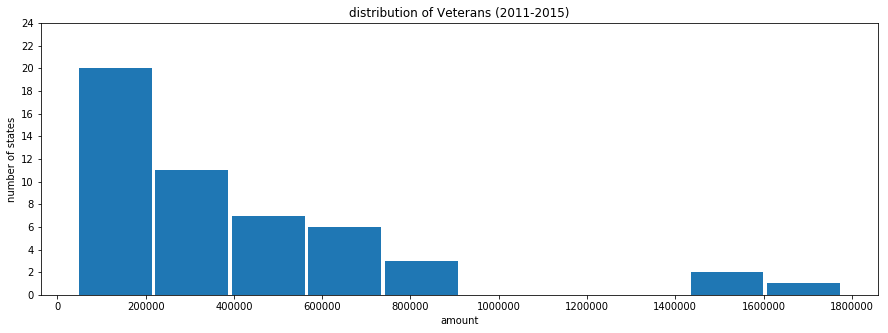

In [62]:
# create a histogram to see distribution of number of veterans
df_t['Veterans, 2011-2015'].hist(rwidth=0.95, figsize=(15,5))
plt.title("distribution of Veterans (2011-2015)")
plt.xlabel('amount')
plt.ylabel('number of states')
plt.xticks(np.arange(0, 2000000, step=200000))
plt.yticks(np.arange(0, 26, step=2))
plt.grid(False)
plt.show()

In [63]:
# get statistics for the number of veterans
df_c_raw['Veterans, 2011-2015'].describe().apply(lambda x: format(x, '.2f'))

count         50.00
mean      401594.00
std       383158.52
min        44708.00
25%       133271.50
50%       302017.50
75%       494949.00
max      1777410.00
Name: Veterans, 2011-2015, dtype: object

**Observations:** 
- The number of veterans was not equally distributed over the states of the U.S. 
- There are some states (3) which each had more than 1,4 million veterans in 2011 to 2015. They made up for roughly one-fifth of all veterans in 2011-2015 (total was 20,079,700))
- More than half of the states had less than 400,000 veterans in 2011 to 2015.

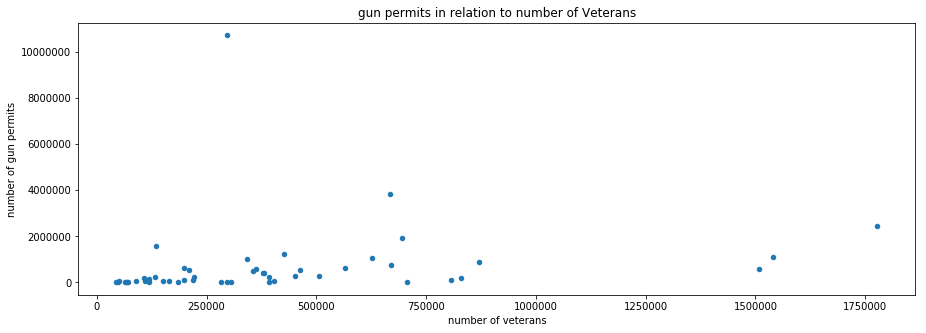

In [64]:
# create a scatter plot
df_t.plot(x='Veterans, 2011-2015', y='permit', kind='scatter', figsize=(15,5))
plt.title("gun permits in relation to number of Veterans")
plt.xlabel('number of veterans')
plt.ylabel('number of gun permits')
plt.ticklabel_format(style='plain')
plt.show()

**Observation:** a higher number of veterans is not associated with a higher number of gun permits.

<a id='q2'></a>
### Q2: Does the number of foreign born persons per state affect the number of gun purchases?

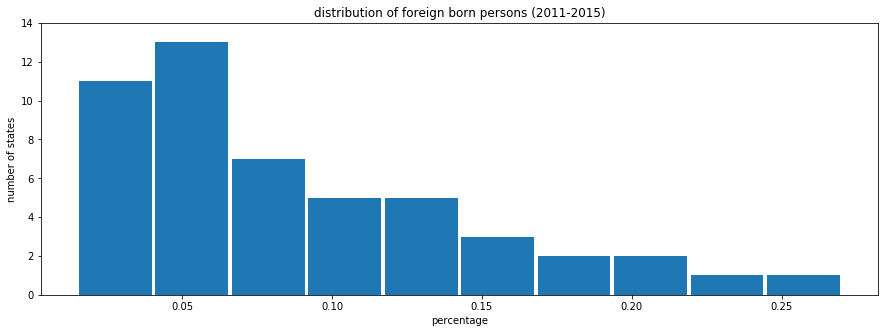

In [65]:
# create a histogram to see distribution of number of foreign born persons
df_t['Foreign born persons, percent, 2011-2015'].hist(rwidth=0.95, figsize=(15,5))
plt.title("distribution of foreign born persons (2011-2015)")
plt.xlabel('percentage')
plt.ylabel('number of states')
plt.yticks(np.arange(0, 15, step=2))
plt.grid(False)
plt.show()

In [66]:
# get statistics for foreign born persons
df_c_raw['Foreign born persons, percent, 2011-2015'].describe().apply(lambda x: format(x, '.3f'))

count    50.000
mean      0.090
std       0.061
min       0.015
25%       0.044
50%       0.068
75%       0.134
max       0.270
Name: Foreign born persons, percent, 2011-2015, dtype: object

**Observations:** 
- In more than half of the states was the percentage of foreign born persons below the mean for the whole country.
- The remaining states therefore had a relatively high percentage with some having more than twice the average.

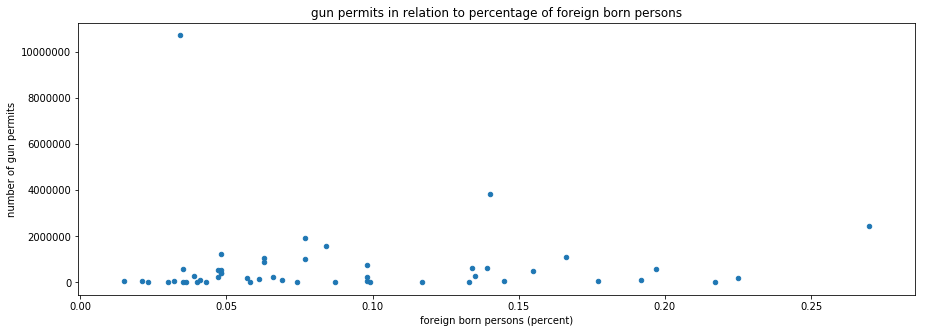

In [67]:
# create a scatter plot
df_t.plot(x='Foreign born persons, percent, 2011-2015', y='permit', kind='scatter', figsize=(15,5))
plt.title("gun permits in relation to percentage of foreign born persons")
plt.xlabel('foreign born persons (percent)')
plt.ylabel('number of gun permits')
plt.ticklabel_format(style='plain')
plt.show()

**Observations:** 
- A high percentage of foreign born persons is not associated with a higher number of gun permits.
- There seems to be an invisible "barrier" at 2 million permits with the most states having less than 1 million permits. 

<a id='q3'></a>
### Q3: What is the overall trend of gun purchases?

In [68]:
# preparing the dataframe

# setting the index to 'month'
df_gd.index = df_gd.month

In [69]:
# group by state
# using resample to calculate sums per year
# turning the series into a dataframe
# source: https://stackoverflow.com/questions/32012012/pandas-resample-timeseries-with-groupby
df_sum = df_gd.groupby('state').resample('A').sum()

In [70]:
# create another dataframe for overall sum and visualization
df_sum_m = df_sum.groupby('month').sum()

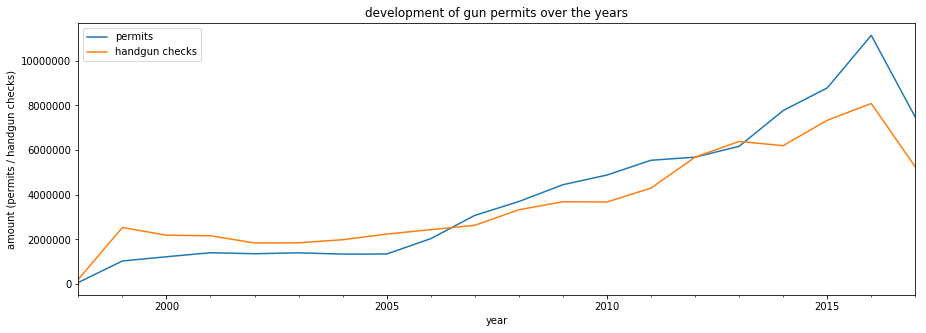

In [71]:
# keeping the ticklabel_format as in the dataframe
plt.ticklabel_format(style='plain')

# group by month and calculate sum to see the overall development
df_sum_m['permit'].plot(label='permits')
df_sum_m['handgun'].plot(label='handgun checks', figsize=(15,5))
#df_sum_m['multiple'].plot(secondary_y=True, figsize=(15,5))
plt.xlabel('year')
plt.ylabel('amount (permits / handgun checks)')
plt.title("development of gun permits over the years")
plt.legend(loc='best')
plt.show()



**Observations:** 
- The number of permits increased over the years beginning in 2005.
- The numer of handgun related checks started to increase at the same time. There is a slight drop in 2014.
- Both variables are decreasing after 2016.

<a id='conclusions'></a>
## Conclusions

### Does the number of veterans per state affect the number of gun purchases?

The scatter plot shows that the amount of veterans in a state does not have an effect on the number of gun permits. You cannot state that a high/low number of veterans lead to a high/low number of gun permits.

### Does the number of foreign born persons per state affect the number of gun purchases?

The same observations applies for the variable "foreign born persons": there seems to be no connection between a high/low percentage of these individuals with the number of gun permits.

### What is the overall trend of gun purchases?

The overall trend of gun purchases (permits to be precise) shows a steady increase beginning in 2005. The maximum is reached in 2016 with over 11 million permits. There is a noticable drop in 2017 where the number of permits is on the same level as in 2014.

### Limitations of the analysis

The limitations to this analysis are to be found in the quality of the data itself. The GitHub repo states that data for California has been removed because it was inconsistent. Additionally there are Nulls to be found which cannot be accounted for. One could interpret them for example as "zero checks" or "zero permits" but they could also be missing for a number of reasons. A torough interpretation is furthermore not easy to perform because there are no explanations for the individual aspects. 


In [72]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0